# 18장. 시퀀스 배열로 다루는 순환 신경망(RNN)

순환 신경망: 여러 개의 데이터가 순서대로 입력되었을 때 앞서 입력받은 데이터를 잠시 기억해 놓는 방법 <br>
그리고 기억된 데이터가 얼마나 중요한지를 판단하여 별도의 가중치를 줘서 다음 데이터로 넘어감 <br>
같은 층 안에서 맴도는 성질 때문에 순환 신경망이라 부름

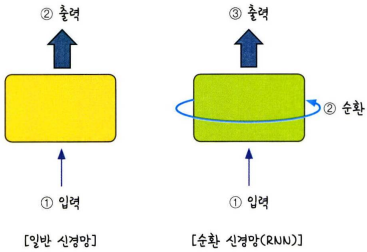

순환이 되는 가운데 앞서 나온 입력에 대한 결과가 뒤에 나오는 입력 값에 영향을 줌 <br>
→ 비슷한 두 문장이 입력되었을 때 그 차이를 구별하여 출력 값에 반영할 수 있음

- LSTM: 한 층 안에서 반복을 많이 해야 하는 RNN의 특성상 일반 신경망보다 기울기 소실 문제가 더 많이 발생하고 이를 해결하기 어렵다는 단점을 보완한 방법 <br>
→ 즉, 반복되기 직전에 다음 층으로 기억된 값을 넘길지 안 넘길지를 관리하는 단계를 하나 더 추가하는 것

RNN 방식의 장점: 입력 값과 출력 값의 설정에 따라 여러 가지 상황에서 적용 가능 <br>
1. 다수 입력 단일 출력 <br>
2. 단일 입력 다수 출력 <br>
3. 다수 입력 다수 출력

<hr>

## 1. LSTM을 이용한 로이터 뉴스 카테고리 분류하기

In [1]:
# 로이터 뉴스 데이터셋 불러오기
from keras.datasets import reuters

In [2]:
# 불러온 데이터를 학습셋과 테스트셋으로 나누기
(X_train, Y_train),(X_test, Y_test)=reuters.load_data(num_words=1000,test_split=0.2)

2110848/2110848 [==============================] - 1s 0us/step


In [4]:
# 데이터 확인 후 출력
import numpy

category=numpy.max(Y_train)+1
print(category, '카테고리')
print(len(X_train),'학습용 뉴스 기사')
print(len(X_test),'테스트용 뉴스 기사')
print(X_train[0])

46 카테고리
8982 학습용 뉴스 기사
2246 테스트용 뉴스 기사
[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 2, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 2, 2, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 2, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


숫자가 나오는 이유: 딥러닝은 단어를 그대로 사용하지 않고 숫자로 변환한 다음 학습 가능 <br>
데이터 안에서 해당 단어가 몇 번이나 나타나는지 세어 빈도에 따라 번호를 붙임

num_word=1000: 빈도가 1~1000에 해당하는 단어만 선택해서 불러오는 것

In [5]:
from keras.preprocessing import sequence

# 데이터 전처리
x_train=sequence.pad_sequences(X_train,maxlen=100)
x_test=sequence.pad_sequences(X_test,maxlen=100)

maxlen=100: 단어 수를 100개로 맞춰라 <br>
만약 입력된 기사의 단어 수가 100보다 크면 100개째 단어만 선택하고 나머지는 버림 <br>
100에서 모자라면 모자라는 부분을 모두 0으로 채움

In [23]:
# 데이터 전처리
from tensorflow.keras.utils import to_categorical

y_train=to_categorical(Y_train)
y_test=to_categorical(Y_test)

In [17]:
# 모델의 설정
from tensorflow.keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense

model=Sequential()
model.add(Embedding(1000,100))
model.add(LSTM(100,activation='tanh'))
model.add(Dense(46,activation='softmax'))

Embedding: 데이터 전처리 과정을 통해 입력된 값을 받아 다음 층이 알아들을 수 있는 형태로 변환 <br>
LSTM: RNN에서 기억 값에 대한 가중치 제어

In [25]:
# 모델의 컴파일
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# 모델의 실행
history=model.fit(x_train, y_train, batch_size=10, epochs=20,
                  validation_data=(x_test,y_test))

# 테스트 정확도 출력
print("\n Test Accuracy: %.4f" %(model.evaluate(x_test,y_test)[1]))

Epoch 1/20
899/899 [==============================] - 65s 69ms/step - loss: 1.0673 - accuracy: 0.7345 - val_loss: 1.1928 - val_accuracy: 0.7084
Epoch 2/20
899/899 [==============================] - 61s 68ms/step - loss: 0.9806 - accuracy: 0.7552 - val_loss: 1.1805 - val_accuracy: 0.7039
Epoch 3/20
899/899 [==============================] - 61s 68ms/step - loss: 0.9021 - accuracy: 0.7738 - val_loss: 1.1850 - val_accuracy: 0.7133
Epoch 4/20
899/899 [==============================] - 60s 67ms/step - loss: 0.8229 - accuracy: 0.7918 - val_loss: 1.1561 - val_accuracy: 0.7226
Epoch 5/20
899/899 [==============================] - 61s 67ms/step - loss: 0.7573 - accuracy: 0.8056 - val_loss: 1.1445 - val_accuracy: 0.7297
Epoch 6/20
899/899 [==============================] - 61s 67ms/step - loss: 0.6913 - accuracy: 0.8225 - val_loss: 1.1765 - val_accuracy: 0.7191
Epoch 7/20
899/899 [==============================] - 61s 67ms/step - loss: 0.6242 - accuracy: 0.8397 - val_loss: 1.1807 - val_accuracy:

### LSTM을 이용해 로이터 뉴스 카테고리 분석하기

46 카테고리
8982 학습용 뉴스 기사
2246 테스트용 뉴스 기사
[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 2, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 2, 2, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 2, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]
Epoch 1/5
899/899 [==============================] - 70s 73ms/step - loss: 2.1384 - accuracy: 0.4590 - val_loss: 1.8709 - val_accuracy: 0.5338
Epoch 2/5
899/899 [==============================] - 68s 76ms/step - loss: 1.7398 - accuracy: 0.5547 - val_loss: 1.7109 - val_accuracy: 0.5548
Epoch 3/5
899/899 [==============================] - 69s 77ms/step - loss: 1.5719 - accuracy: 0.6019 - val_loss: 1.5360 - val_accuracy: 0.6149
Epoch 4/5
899/899 [==============================] - 92s 102ms/step - loss: 1.3750 - accuracy: 0.6585 - val_loss: 1.3628 - val_accuracy: 0.6572
Epoch 5/5
71/71 [========================

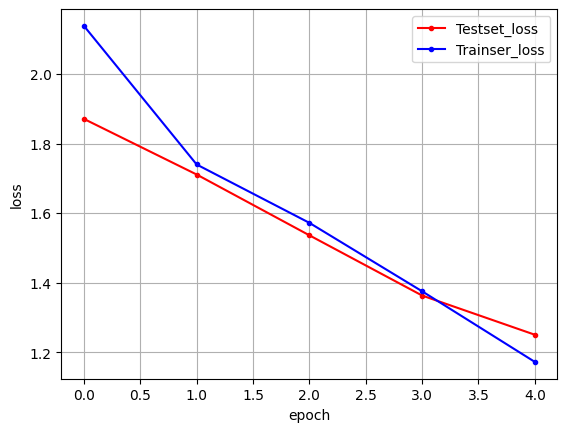

In [27]:
from keras.datasets import reuters
from keras.models import Sequential
from keras.layers import Dense,LSTM,Embedding
from keras.preprocessing import sequence
from tensorflow.keras.utils import to_categorical

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# seed 값 설정
seed=0
np.random.seed(seed)
tf.random.set_seed(3)

# 불러온 데이터를 학습셋과 테스트 셋으로 나누기
(X_train, Y_train),(X_test, Y_test)=reuters.load_data(num_words=1000,test_split=0.2)

# 데이터 확인하기
category=np.max(Y_train)+1
print(category, '카테고리')
print(len(X_train),'학습용 뉴스 기사')
print(len(X_test),'테스트용 뉴스 기사')
print(X_train[0])

# 데이터 전처리
x_train=sequence.pad_sequences(X_train,maxlen=100)
x_test=sequence.pad_sequences(X_test,maxlen=100)
y_train=to_categorical(Y_train)
y_test=to_categorical(Y_test)

# 모델의 설정
model=Sequential()
model.add(Embedding(1000,100))
model.add(LSTM(100,activation='tanh'))
model.add(Dense(46,activation='softmax'))

# 모델의 컴파일
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# 모델의 실행
history=model.fit(x_train, y_train, batch_size=10, epochs=5,
                  validation_data=(x_test,y_test))

# 테스트 정확도 출력
print("\n Test Accuracy: %.4f" %(model.evaluate(x_test,y_test)[1]))

# 테스트셋의 오차
y_vloss=history.history['val_loss']

# 학습셋의 오차
y_loss=history.history['loss']

# 그래프로 표현
x_len=np.arange(len(y_loss))
plt.plot(x_len,y_vloss,marker='.',c="red",label='Testset_loss')
plt.plot(x_len,y_loss,marker='.',c="blue",label='Trainser_loss')

# 그래프에 그리드를 추가하고 레이블을 표시
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

<hr>

## 2. LSTM과 CNN의 조합을 이용한 영화 리뷰 분류하기

데이터셋에서 나타나는 빈도에 따라 번호가 정해지므로 빈도가 높은 데이터를 불러와 학습시킬 수 있음

In [34]:
# 학습셋과 테스트셋 지정하기
from keras.datasets import imdb

(x_train, y_train),(x_test,y_test)=imdb.load_data(num_words=5000)

# 데이터 전처리
x_train=sequence.pad_sequences(x_train,maxlen=100)
x_test=sequence.pad_sequences(x_test,maxlen=100)

17464789/17464789 [==============================] - 1s 0us/step


In [33]:
# 모델의 설정
from keras.layers import Dropout, Conv1D, MaxPooling1D, Activation

model=Sequential()
model.add(Embedding(5000,100))
model.add(Dropout(0.5))
model.add(Conv1D(64,5,padding='valid',activation='relu',strides=1))
model.add(MaxPooling1D(pool_size=4))
model.add(LSTM(55))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, None, 100)         500000    
                                                                 
 dropout_2 (Dropout)         (None, None, 100)         0         
                                                                 
 conv1d_1 (Conv1D)           (None, None, 64)          32064     
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, None, 64)          0         
 g1D)                                                            
                                                                 
 lstm_3 (LSTM)               (None, 55)                26400     
                                                                 
 dense_3 (Dense)             (None, 1)                 56        
                                                      

Conv1D: Conv2D의 개념을 1차원으로 옮긴 것 <br>
컨볼루션 층이 1차원이고 이동하는 배열도 1차원임

MaxPooling1D: 2차원 배열이 1차원으로 바뀌어 정해진 구역 안에서 가장 큰 값을 다음 층으로 넘기고 나머지는 버림

### LSTM과 CNN을 조합해 영화 리뷰 분류하기

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, None, 100)         500000    
                                                                 
 dropout_3 (Dropout)         (None, None, 100)         0         
                                                                 
 conv1d_2 (Conv1D)           (None, None, 64)          32064     
                                                                 
 max_pooling1d_2 (MaxPoolin  (None, None, 64)          0         
 g1D)                                                            
                                                                 
 lstm_4 (LSTM)               (None, 55)                26400     
                                                                 
 dense_4 (Dense)             (None, 1)                 56        
                                                      

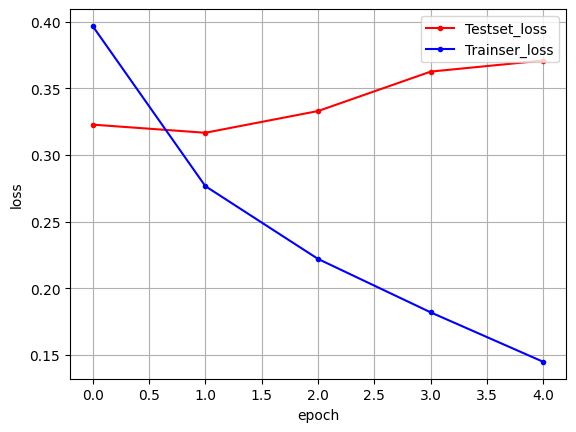

In [36]:
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Embedding
from keras.layers import LSTM
from keras.layers import Conv1D, MaxPooling1D
from keras.datasets import imdb

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# seed 값 설정
seed=0
np.random.seed(seed)
tf.random.set_seed(3)

# 학습셋과 테스트셋 지정하기
(X_train, Y_train),(X_test, Y_test)=imdb.load_data(num_words=5000)

# 데이터 전처리
x_train=sequence.pad_sequences(X_train,maxlen=100)
x_test=sequence.pad_sequences(X_test,maxlen=100)

# 모델의 설정
model=Sequential()
model.add(Embedding(5000,100))
model.add(Dropout(0.5))
model.add(Conv1D(64,5,padding='valid',activation='relu',strides=1))
model.add(MaxPooling1D(pool_size=4))
model.add(LSTM(55))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.summary()

# 모델의 컴파일
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# 모델의 실행
history=model.fit(x_train, y_train, batch_size=10, epochs=5,
                  validation_data=(x_test,y_test))

# 테스트 정확도 출력
print("\n Test Accuracy: %.4f" %(model.evaluate(x_test,y_test)[1]))

# 테스트셋의 오차
y_vloss=history.history['val_loss']

# 학습셋의 오차
y_loss=history.history['loss']

# 그래프로 표현
x_len=np.arange(len(y_loss))
plt.plot(x_len,y_vloss,marker='.',c="red",label='Testset_loss')
plt.plot(x_len,y_loss,marker='.',c="blue",label='Trainser_loss')

# 그래프에 그리드를 추가하고 레이블을 표시
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()